In this Jupyter Notebook, we will look at the Seattle AirBnB data. We will browse through the data set and ask the following questions:
1. Out of these listings, how often are these listings available during the year
2. How much does the price vary during the months
3. In Seattle, how does the average price vary by zip code?
 

In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# There are three files provided; listings, reviews, and calendear. 
# Sinece these are excel files, the first step really is just to open them in Excel to browse there.
# Let's load them the data into Jupyter

list_df = pd.read_csv("DataSets/AirBnB Seattle/listings.csv")
reviews_df = pd.read_csv("DataSets/AirBnB Seattle/reviews.csv")
calendar_df = pd.read_csv("DataSets/AirBnB Seattle/calendar.csv")

In [3]:
#Let's see what we have in listings.
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Let's get an overview of the data we have. Let's find out:
1. How many total listings is available, versus how many have actually been rented
2. Distribution of the number of reviews each listing got
3. 



In [6]:
print ("There are ", list_df.shape[0], " total listings")
print ("There are ", calendar_df.shape[0], " total calendar entries")

There are  3818  total listings
There are  1393570  total calendar entries


In [7]:
#Let's verify each listing have 365 entries
calendarEntryCount = pd.DataFrame(calendar_df.groupby("listing_id").count()["date"]).reset_index()
calendarEntryCount.columns = ["listing_id", "count"]
calendarEntryCount.head()

,listing_id,count
0,3335,365
1,4291,365
2,5682,365
3,6606,365
4,7369,365


In [8]:
calendarEntryCount["count"].value_counts()

365    3818
Name: count, dtype: int64

In [9]:
#Ok confirmed each has 365 days. Let's take a look at how often these entries are available
availableCount = pd.DataFrame(calendar_df[calendar_df["available"] == "t"].groupby("listing_id").count()["available"]).reset_index().sort_values("available")
availableCount.columns = ["listing_id", "days available"]
availableCount.head()

,listing_id,days available
1121,3819831,1
3696,10235136,1
3687,10210625,1
3604,9868607,1
3562,9714078,1


[Text(0, 0.5, 'Listing count')]

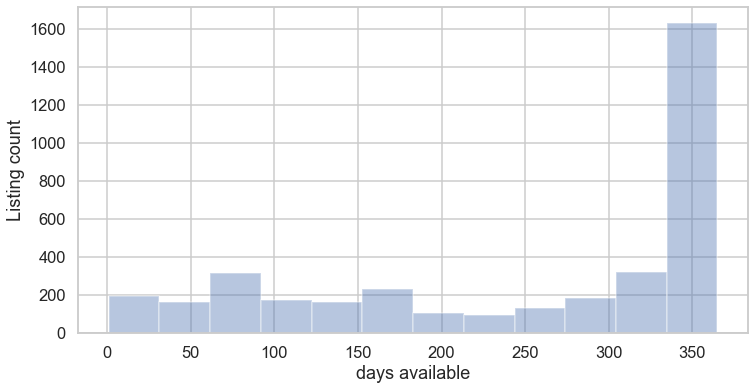

In [33]:
sns.set(style="whitegrid")
sns.set_context("talk")
fig, ax = pyplot.subplots(figsize=(12,6))
ax = sns.distplot(availableCount["days available"], bins=12, kde=False)
ax.set(ylabel='Listing count')

In [11]:
testTS = pd.Timestamp("12/4/16")
testTS.month

12

In [12]:
#We can see the majority of them are available throught out the year. The next question we will check is whether people vary the price during the months
#Let's first get only the listings who have a price in every month. We'll first calculate the average monthly price for each listing. 
#We'll do that by extracting the month, add it as a column, then group and average the price by the month
calendar_df["Year Month"] = calendar_df["date"].apply(lambda x: str(pd.Timestamp(x).year) + " - " + str('{:02d}'.format(pd.Timestamp(x).month)))
calendar_df.head()

,listing_id,date,available,price,Year Month
0,241032,2016-01-04,t,$85.00,2016 - 01
1,241032,2016-01-05,t,$85.00,2016 - 01
2,241032,2016-01-06,f,NaN,2016 - 01
3,241032,2016-01-07,f,NaN,2016 - 01
4,241032,2016-01-08,f,NaN,2016 - 01


In [13]:
calendar_df["Year Month"].value_counts()

2016 - 12    118358
2016 - 05    118358
2016 - 03    118358
2016 - 07    118358
2016 - 08    118358
2016 - 10    118358
2016 - 06    114540
2016 - 04    114540
2016 - 09    114540
2016 - 11    114540
2016 - 02    110722
2016 - 01    106904
2017 - 01      7636
Name: Year Month, dtype: int64

In [14]:
#We only want to look at entries, that has a price in each month of the year. Otherwise, if some crazy expensive listing is only available on Christmas or something, that'd throw off the averages.
# fullYearEntries = 
calendarWithPrice_df = calendar_df.dropna()
calendarWithPrice_df.head()

,listing_id,date,available,price,Year Month
0,241032,2016-01-04,t,$85.00,2016 - 01
1,241032,2016-01-05,t,$85.00,2016 - 01
9,241032,2016-01-13,t,$85.00,2016 - 01
10,241032,2016-01-14,t,$85.00,2016 - 01
14,241032,2016-01-18,t,$85.00,2016 - 01


In [15]:
#We can see that the price column is a string, let's fix that and then do an average
calendarWithPrice_df["priceFloat"] = calendarWithPrice_df["price"].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)

/Users/rl250199/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
calendarWithPrice_df.head()

,listing_id,date,available,price,Year Month,priceFloat
0,241032,2016-01-04,t,$85.00,2016 - 01,85.0
1,241032,2016-01-05,t,$85.00,2016 - 01,85.0
9,241032,2016-01-13,t,$85.00,2016 - 01,85.0
10,241032,2016-01-14,t,$85.00,2016 - 01,85.0
14,241032,2016-01-18,t,$85.00,2016 - 01,85.0


In [17]:
monthlyMeanPrice = calendarWithPrice_df[["listing_id","Year Month","priceFloat"]].groupby(["listing_id", "Year Month"]).mean().reset_index()
monthlyMeanPrice["Year Month"].value_counts()

2016 - 04    3002
2016 - 03    2950
2017 - 01    2931
2016 - 02    2895
2016 - 01    2868
2016 - 12    2866
2016 - 11    2771
2016 - 06    2720
2016 - 05    2705
2016 - 10    2694
2016 - 09    2649
2016 - 08    2561
2016 - 07    2503
Name: Year Month, dtype: int64

In [18]:
#Looks like there are data from 2016 to 2017. For this exercise let's just focus on data in 2016
monthlyMeanPrice = monthlyMeanPrice[monthlyMeanPrice["Year Month"] != "2017 - 01"]

In [19]:
#Now let's get the listing that have 12 months of pricing
fullyearListId = pd.DataFrame(monthlyMeanPrice.groupby("listing_id")["Year Month"].count()).reset_index()
fullyearListId.columns = ["listing_id", "price available"]

In [20]:
fullyearListId.head()

,listing_id,price available
0,3335,11
1,4291,12
2,5682,12
3,6606,12
4,7369,4


In [21]:
fullyearListId = fullyearListId[fullyearListId["price available"] == 12]
print(fullyearListId.shape)
fullyearListId.head()

(1849, 2)


,listing_id,price available
1,4291,12
2,5682,12
3,6606,12
5,9419,12
9,9596,12


In [22]:
#There are 1849 listing IDs that have prices for each of the twelve months. Now, let's filter the monthly mean prices down to only those listings that have average prices for the whole year
monthlyMeanPrice = monthlyMeanPrice[monthlyMeanPrice["listing_id"].isin(fullyearListId["listing_id"])]

In [23]:
monthlyMeanPrice.shape

(22188, 3)

In [24]:
monthlyMeanPrice.head()

,listing_id,Year Month,priceFloat
12,4291,2016 - 01,82.0
13,4291,2016 - 02,82.0
14,4291,2016 - 03,82.0
15,4291,2016 - 04,82.0
16,4291,2016 - 05,82.0


In [49]:
#Now we have a bunch of listings, which have prices for each month of the year. Let's average those, and see how it varies throughout the month
allListingMeanPrice = monthlyMeanPrice.groupby("Year Month")["priceFloat"].mean()

In [50]:
allListingMeanPrice

Year Month
2016 - 01    121.600556
2016 - 02    125.932172
2016 - 03    131.022167
2016 - 04    134.780409
2016 - 05    139.344289
2016 - 06    148.825113
2016 - 07    152.524352
2016 - 08    151.536019
2016 - 09    142.920710
2016 - 10    136.260963
2016 - 11    134.868465
2016 - 12    136.639634
Name: priceFloat, dtype: float64

In [51]:
# allListingMeanPrice = allListingMeanPrice.rename({"2016 - 01":"Jan", "2016 - 02":"Feb", "2016 - 03":"Mar", "2016 - 04":"Apr", "2016 - 05":"May", "2016 - 06":"Jun",
#                           "2016 - 07":"Jul", "2016 - 08":"Aug", "2016 - 09":"Sep", "2016 - 10":"Oct", "2016 - 11":"Nov", "2016 - 12":"Dec"})

In [52]:
allListingMeanPrice

Year Month
2016 - 01    121.600556
2016 - 02    125.932172
2016 - 03    131.022167
2016 - 04    134.780409
2016 - 05    139.344289
2016 - 06    148.825113
2016 - 07    152.524352
2016 - 08    151.536019
2016 - 09    142.920710
2016 - 10    136.260963
2016 - 11    134.868465
2016 - 12    136.639634
Name: priceFloat, dtype: float64

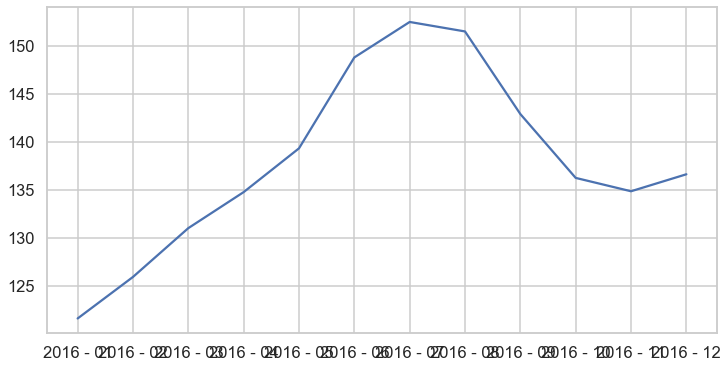

In [56]:
#Let's graph it
fig, ax = pyplot.subplots(figsize=(12,6))
sns.lineplot(data=allListingMeanPrice)

Text(0.5, 1.0, '2016 Seattle mean listing prices')

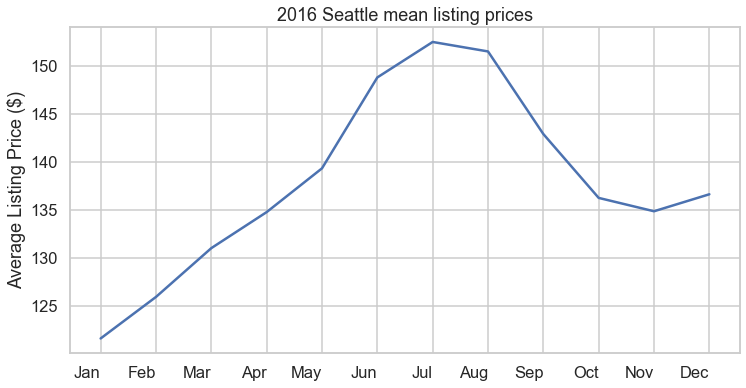

In [69]:
#Well the label isn't very pretty is it! Let's make it look a bit better.
sns.set(style="whitegrid")
sns.set_context("talk")
fig, ax = pyplot.subplots(figsize=(12,6))
chart = sns.lineplot(data=allListingMeanPrice, palette="tab10", linewidth=2.5)
chart.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], horizontalalignment='right') #Can also consider adding: rotation=45
chart.set_ylabel("Average Listing Price ($)")
chart.set_title("2016 Seattle mean listing prices")

In [70]:
#Now let's take a look at the pricing by zip code. First let's just check how many listings per zip code doe we have
list_df["zipcode"].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

In [73]:
#We can see there are some zip codes that only has a few entries. From the above, let the cut off be 40.
zipsWithData = pd.DataFrame(list_df["zipcode"].value_counts()).reset_index()
zipsWithData.columns = ["zipcode", "count"]
zipsWithData.head()

,zipcode,count
0,98122,420
1,98103,394
2,98102,339
3,98105,225
4,98109,202


In [75]:
zipsWithData = zipsWithData[zipsWithData["count"] > 40]

In [83]:
#Now we need to join the prices listed in the calendar data, with the zip code here
calendarWithPrice_df.head(2)

,listing_id,date,available,price,Year Month,priceFloat
0,241032,2016-01-04,t,$85.00,2016 - 01,85.0
1,241032,2016-01-05,t,$85.00,2016 - 01,85.0


In [79]:
list_df.shape

(3818, 92)

In [81]:
listingInZip = list_df[list_df["zipcode"].isin(zipsWithData["zipcode"])][["id", "zipcode"]]

In [82]:
listingInZip.shape

(3774, 2)

In [84]:
listingInZip.head(2)

,id,zipcode
0,241032,98119
1,953595,98119


In [85]:
calendarWithPrice_df.head(2)

,listing_id,date,available,price,Year Month,priceFloat
0,241032,2016-01-04,t,$85.00,2016 - 01,85.0
1,241032,2016-01-05,t,$85.00,2016 - 01,85.0


In [88]:
listZipPrice = listingInZip.merge(calendarWithPrice_df[["listing_id", "date", "priceFloat"]], left_on="id", right_on="listing_id") 

In [89]:
listZipPrice.head(2)

,id,zipcode,listing_id,date,priceFloat
0,241032,98119,241032,2016-01-04,85.0
1,241032,98119,241032,2016-01-05,85.0


In [100]:
meanPriceByZip = pd.DataFrame(listZipPrice.groupby("zipcode")["priceFloat"].mean()).reset_index().sort_values("priceFloat", ascending=False)
meanPriceByZip.head(10)

,zipcode,priceFloat
0,98101,201.579881
15,98121,196.750204
22,98199,191.517516
14,98119,182.002733
8,98109,172.418371
11,98116,152.640778
3,98104,150.839620
16,98122,140.205190
20,98136,139.826377
1,98102,133.495981


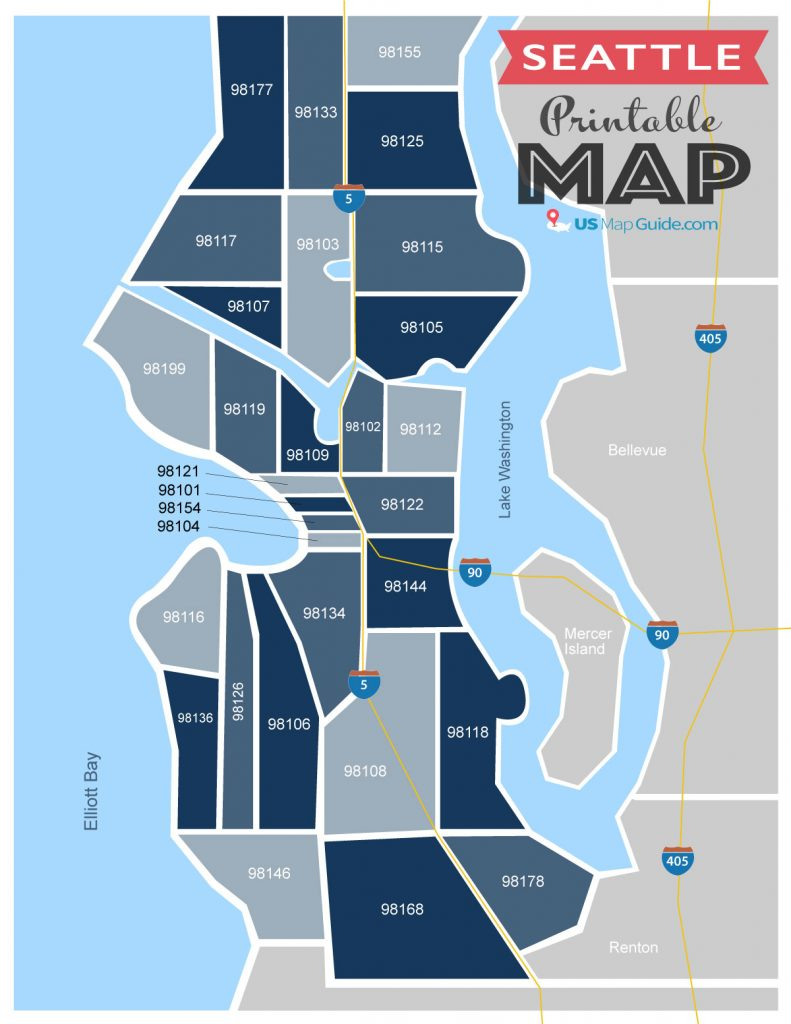

In [107]:
# Now that we have the pricing by the zipcode, we certainly would like to display it on a map! 
# However displaying data on a map itself is worth a separate exercise. 
# In the mean time I'll just include an image of the Seattle zip code
from IPython.display import Image
Image(filename="DataSets/seattleZipCodeMap.jpg")